# MNIST 데이터 불러오기
MNIST 데이터는 학습에서 사용될 부분(X_train, y_train)과 테스트에서 사용될 부분(X_test, y_test)을 나누어 케라스에서 불러옵니다.<br>
그 중 한 이미지만 불러와서 인덱스가 35인 숫자 이미지를 matplotlib로 출력해봅니다.

5


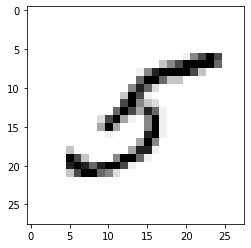

(60000, 28, 28)
(10000, 28, 28)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_index = 35
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap='Greys')
plt.show()

print(X_train.shape)
print(X_test.shape)

아이리스 품종 예측 시 원-핫 인코딩 방법을 적용해야 하므로 0~9까지의 정수형 값을 갖는 클래스값을 0이나 1로 이루어진 벡터로 바꿔야 합니다.<br> 
이 때 to_categorical(클래스, 클래스의 개수) 함수를 사용합니다.<br>

In [5]:
from keras.utils import to_categorical
num_classes = 10

print(y_train[:image_index + 1])
y_train = to_categorical(y_train, num_classes)
print(y_train[:image_index + 1])
y_test = to_categorical(y_test, num_classes)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [

# Version 1. Sequential 모델
https://www.tensorflow.org/guide/keras/sequential_model?hl=ko

<b><Accuracy 높히기></b>

-<b>은닉층</b>: 은닉층을 하나 추가했을 때 accuracy가 더 높게 나왔는데, 여기서 하나 더 추가했을 경우에는 성능에 큰 차이가 없었습니다.<br><br>
-<b>node</b>: node 개수가 많아질수록 activation 함수가 커졌습니다.<br>그런데 100 이상부터는 차이가 크게 없어서 100으로 설정하였습니다.<br><br>
-<b>Epoch</b>: epoch 수가 클수록 accuracy가 높아졌는데 15 이상부터는 큰 변화가 없어서 epoch 수는 15로 정했습니다.<br>
은닉층1과 은닉층2의 값을 비슷하게 하는 것이 은닉층1을 더 크게 하고 은닉층2에서 사이즈가 많이 줄어드는 것보다 더 accuracy를 높일 수 있었습니다.<br><br>
-<b>optimizer</b>: SGD와 AdaGrad, RMSProp를 시도해봤는데 adam이 가장 성능이 좋았습니다.<br><br>
-<b>loss</b>: loss는 그대로 사용하였습니다.<br>
-<b>activation</b>: relu 대신 hypertangent, elu, selu, softsign, exponential를 넣어봤는데 역시 relu가 성능이 제일 좋았습니다.<br><br>
    

-<b>(주의할 점)</b> kernel을 restart를 안 하고 코드를 계속 돌렸더니 accuracy가 지속적으로 상승했습니다.<br>
처음에는 성능이 더 좋아진 줄 알았지만 kernel을 restart하고 다시 해본 결과랑 차이가 있어서 unbiased한 상황에서 성능을 확인하기 위해 코드를 매번 돌릴 때마다 restart를 해주었습니다.<br>

In [6]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

'''
def leakyrelu_func(x): # Leaky ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return (x>=0)*x + (x<0)*0.01*x 

def elu_func(x): # ELU(Exponential linear unit)
    return (x>=0)*x + (x<0)*0.01*(np.exp(x)-1)
'''

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2522 - accuracy: 0.9236
Epoch 2/15
60000/60000 [==============================] - 9s 155us/sample - loss: 0.1105 - accuracy: 0.9662
Epoch 3/15
60000/60000 [==============================] - 10s 158us/sample - loss: 0.0798 - accuracy: 0.9753
Epoch 4/15
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0598 - accuracy: 0.9812
Epoch 5/15
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0506 - accuracy: 0.9836
Epoch 6/15
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0416 - accuracy: 0.9866
Epoch 7/15
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0346 - accuracy: 0.9885
Epoch 8/15
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0301 - accuracy: 0.9900
Epoch 9/15
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0280 - accuracy: 0.9901
Epo

[0.09887333274107614, 0.9769]